<a href="https://colab.research.google.com/github/Skeulse/test/blob/master/Hw2_2_gg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Part 1: Importance Sampling and risk theory </center>

We will use the importance sampling technique as variance reduction method for a classical problem of risk theory.


## Risk evaluation  

Let us consider an insurance company starting with some initial capital $b$. The business earns money due to the premiums, but has to face claims. Premiums arrive at constant rate, while claims arrive at random times with random magnitudo. If at any time $t>0$ the surplus level becomes negative, the company fails. Is it possible to evaluate the probability $P(b)$ that company goes bankrupt? 
Modern risk theory goes back to the works of Filip Lundberg and Harald Cramér. They developed quantitative approaches to evaluate the ruin probability. Here we consider a variant of the original model where the surplus level is a random walk evolving at discrete time $\tau=0,1,2,\ldots$. 

We call $x(\tau)$ the surplus level at time $\tau$. We know that $x(0)=b$ and suppose the following evolution:

$$ x(\tau)=x(\tau-1) +\xi_\tau$$

Here $\xi_1,\xi_2, \ldots, \xi_\tau$ are iid Gaussian random numbers with

$$ \langle \xi_i\rangle =c,\quad \quad \langle \left(\xi_i-c \right)^2\rangle=1 \quad \text{for} \; i=1,2,\ldots$$

The company has a potential success only if $c>0$, but this is not sufficient to prevent bankrupt.

How can we evaluate numerically the ruin probability $P(b)$ given $c$? 

 We have to face two problems:

(i) It is difficult to estimate the maximal time after which the fate of the insurance company should be considered as safe 
 
(ii) More importantly, for each example (i.e. each random walk) the observable is one if the path overcomes the origin and zero if it stays above. Then, for large values of b, the ruin probability is a very small number determined by the tiny fraction of 1 (the "rari nantes") appears in a "large sea" of zeros. In these conditions, direct sampling does not provide an accurate estimation of $P(b)$.
Employ the exponential tilting introduced in the lecture for a single Gaussian varialble. Here each example is random walk and it is fully defined by the sequance of jumps. The probability of a random walk of $N$ steps is then 
$$ p(\{\xi_1,\xi_2,\ldots,\xi_N\}) = \prod_{i=1}^N \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)$$

------------------------------

(Q1) Introduce an exponential tiliting $\exp(t \xi_i)$ for all $i=1,\dots,N$. Compute the bias distribution $q(\{\xi_1,\xi_2,\ldots,\xi_N\})$:

Answer space

$$ q(\{\xi_1,\xi_2,\ldots,\xi_N\})=\prod_{i=1}^N \frac{e^{t \xi_i}}{\langle e^{t\xi_i}\rangle}_p   \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)$$ 

Nevertheless $\langle e^{t\xi_i}\rangle_p = e^{ct + t^2/2}$ then :

$$ q(\{\xi_1,\xi_2,\ldots,\xi_N\})=\prod_{i=1}^N \frac{e^{t \xi_i}}{e^{ct + t^2/2}}   \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)$$ 

Thus $$ q(\{\xi_1,\xi_2,\ldots,\xi_N\})=\prod_{i=1}^N \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-(c+t))^2/2}\right)$$



(Q2) the weight $w(\{\xi_1,\xi_2,\ldots,\xi_N\})=p(\{\xi_1,\xi_2,\ldots,\xi_N\})/q(\{\xi_1,\xi_2,\ldots,\xi_N\})$ which tell us how to re-weight the observable in order to compensate the bias.   Explain that the $t=-2 c$ simplifies the likelihood ratio $w$

Answer space

$$w(\{\xi_1,\xi_2,\ldots,\xi_N\})= \frac{\prod_{i=1}^N \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)}{\prod_{i=1}^N \left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-(c+t))^2/2}\right)}$$

Thus  $$w(\{\xi_1,\xi_2,\ldots,\xi_N\})=\prod_{i=1}^N \frac{\left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-c)^2/2}\right)}{\left(\frac{1}{\sqrt{2 \pi}} e^{-(\xi_i-(c+t))^2/2}\right)}$$

So  $$w(\{\xi_1,\xi_2,\ldots,\xi_N\})=\prod_{i=1}^N e^{(c-\xi_i)t+t^2/2}$$

The choice $t=-2 c$ gives :


$$w(\vec \xi)=\prod_{i=1}^N e^{2c\xi_i} $$


---------------------

(Q3)
Write a code to compute the ruin probability $P(b)$ keeping the maximal time infinite. Let's set $ c=0.1, \; N_{trials}=10000\; b=20, \quad t=- 2 c $. Infer $P(b)$ with its statistical error.



If we take a time of 2000 iterations we obtain :
P(b) is equal to  0.01630 ± 0.00002 when b=20

Since the probability is low but not so much we can compute it without using an exponential tilting, thus we obtain:
P(b) is equal to  0.01650 ± 0.00127 when b=20
As expected, the probability obtained without importance sampling is less precise but remains at least in a good order of magnitude

In order to check that our time of 1500 iterations is enought to estimate P(b) with b=20, we can plot P(b) with its error bar in function of the number of iterations:


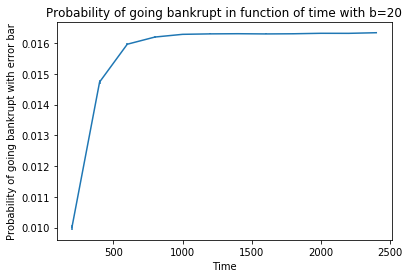

1500 iterations seems to be a good value when b=20, in fact, when the number of iterations is higher the precision doesn't change but the time of calculation is longer


In [ ]:
import numpy
import random,math
c=0.1
t=-2*c
N_trials = 10000
b=20

def question_3(N_times):
    all_position=[]
    for j in range(N_trials):
        observable = 0
        money = b
        weight_i = 1
        for i in range(N_times):
            dx = random.gauss(c+t,1.) #because of question 1
            weight_i = weight_i * math.exp(2*c*dx)
            money = money + dx
            if money <0:
                observable = 1
                break #No need to go further, the company is bankrupt !
        
        
        all_position.append(observable*weight_i)
    xerror = numpy.std(numpy.array(all_position))
    xm = numpy.mean(numpy.array(all_position))
    print('P(b) is equal to  %.5f \u00B1 %.5f when b=20'  % (xm,xerror/(float(N_trials)**0.5)))

def question_3_without_importance_sampling(N_times):
    all_position=[]
    for j in range(N_trials):
        observable = 0
        money = b
        weight_i = 1
        for i in range(N_times):
            dx = random.gauss(c,1.)
            weight_i = 1 #Without importance sampling the weight remains equal at 1
            money = money + dx
            if money <0:
                observable = 1
                break #No need to go further, the company is bankrupt !
        
        
        all_position.append(observable*weight_i)
    xerror = numpy.std(numpy.array(all_position))
    xm = numpy.mean(numpy.array(all_position))
    print('P(b) is equal to  %.5f \u00B1 %.5f when b=20'  % (xm,xerror/(float(N_trials)**0.5)))    

print('If we take a time of 2000 iterations we obtain :' )
question_3(1500)

print('')
print("Since the probability is low but not so much we can compute it without ")
print("using an exponential tilting, thus we obtain:")
question_3_without_importance_sampling(1500)

print("As expected, the probability obtained without importance sampling is less ")
print("precise but remains at least in a good order of magnitude")

print('')
print("In order to check that our time of 1500 iterations is enought to estimate ")
print("P(b) with b=20, we can plot P(b) with its error bar in function of the ")
print("number of iterations:")

def question_3_times():
    List = numpy.arange(200,2500, 200)
    Mean_list = []
    Error_list = []
    all_position=[]
    for k in range(len(List)):
        all_position=[]
        N_timing=List[k]
        for j in range(N_trials):
            observable = 0
            money = b
            weight_i = 1
            for i in range(N_timing):
                dx = random.gauss(c+t,1.) #because of question 1
                weight_i = weight_i * math.exp(2*c*dx)
                money = money + dx
                if money <0:
                    observable = 1
                    break #No need to go further, the company is bankrupt !
        
        
            all_position.append(observable*weight_i)
        xerror = numpy.std(numpy.array(all_position))
        xerror2 = xerror/(float(N_trials)**0.5)
        xm = numpy.mean(numpy.array(all_position))
        Mean_list.append(xm)
        Error_list.append(xerror2)
    plt.errorbar(List,Mean_list,yerr=Error_list)
    plt.title("Probability of going bankrupt in function of time with b=20")
    plt.ylabel("Probability of going bankrupt with error bar")
    plt.xlabel("Time")
    plt.show()
    
question_3_times()

print("1500 iterations seems to be a good value when b=20, in fact, when "
        "the number of iterations is higher the precision doesn't change but "
          "the time of calculation is longer")

(Q4) Plot the estimation of P(b) with its error for 
$$t=-0.16,\; t=-0.18,\ldots, t=-0.24$$

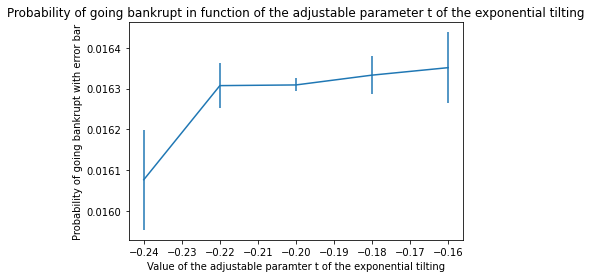

The probability of going bankrupt depends on the value of t, the 
exponential tilting. Nevertheless, for this range of value, the value 
of the probability obtained with t=-2c remains inside the range created by 
the probability obtained with t≠-2c and it's associated error 
Thus the exponential tilting is a stable method, that gives a correct value
 but in order to maximiseits precision t must me be choosen wisely. Here it should 
be taken equal to -2c, but we can ask ourselves it it should always be the value 
that simplifies the expression of the weight 


In [32]:
import matplotlib.pyplot as plt
import random
N_trials=10000
c=0.1
b=20
def question_4_inter(N_times,tau):
    all_position=[]
    for j in range(N_trials):
        observable = 0
        money = b
        weight_i = 1
        for i in range(N_times):
            dx = random.gauss(c+tau,1.) #because of question 1
            weight_i = weight_i * math.exp((c-dx)*tau + ((tau**2)/2))
            money = money + dx
            if money <0:
                observable = 1
                break #No need to go further, the company is bankrupt !
        
        
        all_position.append(observable*weight_i)
    xerror = numpy.std(numpy.array(all_position))/(float(N_trials)**0.5)
    xm = numpy.mean(numpy.array(all_position))
    return xm,xerror

def question_4(N_times):
    tentative = [-0.16,-0.18,-0.20,-0.22,-0.24]
    x_mean_tot = []
    x_error_tot = []
    for k in range(len(tentative)):
        xm,xerror = question_4_inter(N_times,tentative[k])
        x_mean_tot.append(xm)
        x_error_tot.append(xerror)
    plt.errorbar(tentative,x_mean_tot,yerr=x_error_tot)
    plt.title("Probability of going bankrupt in function of the adjustable parameter t of the exponential tilting")
    plt.ylabel("Probability of going bankrupt with error bar")
    plt.xlabel("Value of the adjustable paramter t of the exponential tilting")
    plt.show()

question_4(2000)
print("The probability of going bankrupt depends on the value of t, the ")
print("exponential tilting. Nevertheless, for this range of value, the value ")
print("of the probability obtained with t=-2c remains inside the range created by ")
print("the probability obtained with t\u2260-2c and it's associated error ")
print("Thus the exponential tilting is a stable method, that gives a correct value")
print(" but in order to maximiseits precision t must me be choosen wisely. Here it should ")
print("be taken equal to -2c, but we can ask ourselves it it should always be the value ")
print("that simplifies the expression of the weight ")

<center> Part 2: Quantum particle in the Morse potential <center>
$$\newcommand{\ket}[1]{\vert{#1}\rangle}
\newcommand{\bra}[1]{\langle{#1}\vert}
\newcommand{\proj}[1]{\ket{#1}\bra{#1}}
\newcommand{\modul}[1]{\vert{#1}\vert}
\newcommand{\norm}[1]{\|{#1}\|}
\newcommand{\moy}[1]{\langle{#1}\rangle}
\newcommand{\scamath}[2]{\langle{#1},{#2}\rangle}
\newcommand{\sca}[2]{\langle{#1}\vert{#2}\rangle}
\newcommand{\elem}[3]{\langle{#1}\vert{#2}\vert{#3}\rangle}
\newcommand{\com}[2]{[{#1},{#2}]}
\newcommand{\acom}[2]{\{{#1},{#2}\}}
\newcommand{\op}{\hat}$$
We will study the quantum particle
$$i\frac{\partial \ket{\psi(x,t)}}{\partial t} = H\ket{\psi(x,t)},$$
with
$$
H=p^2/2+V(x)=-1/2 \frac{\partial^2}{\partial x^2}+V(x)
$$
in the Morse potential
$$
V(x)=D_e(\exp(-2(x-1))-2\exp(-(x-1))),
$$
which can be used as a toy model for describing the spectral properties of two bound molecules.

The Schrodinger equation with the Morse potential can be solved exactly by finiding the eigenstates $\ket{\psi_n}$ and coresponding energies  $E_n$ analytically by solving the equation
$$
H\ket{\psi_n}=E_n\ket{\psi_n}.
$$

Analytical solution of the problem reads:

$$
E_n=-s^2/2
$$
with $s=\frac{\nu-2n-1}{2}, \nu=\sqrt{8 De}$ and
$$
\psi_n(z)=\sqrt{\frac{2s\Gamma(n+1)}{\Gamma(\nu-n)}}L_n^{(2s)}(z)z^{s}\exp(-z/2)
$$
with $z=\nu \exp(-(x-1))$. $L_n^{(\alpha)}(x)$  is a generalized Laguerre polynomial, and $\Gamma(x)$ is a gamma function.


Set $D_e=2$ except if specified otherwise.

When answering the questions please follow the following points:

a) The answers should include the code.

b) Graphs and animations are expected to have labeled axes and titles.

(Q5) Write the functions that gives exact eigenvalues and eigenstates of the quantum particle in the Morse potential. Plot the probability distribution $p(x)=|\psi(x)|^2$ as a function of coordinate $x$ for the ground state $\psi_0$. Calculate the groundstate  energy numerically and compare it with the exact result.

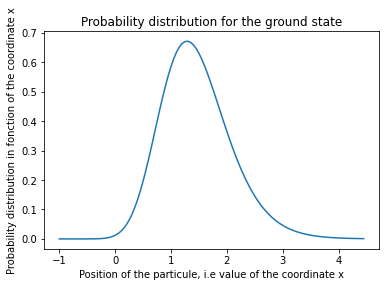

The exact value of the energy of the ground state is equal to 
-1.125
Numerically by doing a discretization of 1000 points both in the position 
and phase space we have obtained 
-1.1250066046017597
The difference between the two is of the order of 10^-6 
One can reduce it by doing more precise discreization and possibly 
take a larger range of values for positions and space.


In [31]:
import scipy.special
import numpy

def question_5(n,De,x):
    v=numpy.sqrt(8*De)
    s=(v - (2*n) -1)/(2)
    eigenvalue = -((s**2)/2)
    Laguerre = scipy.special.genlaguerre(n,2*s)
    gamma_n1 = math.gamma(n+1)
    gamma_v = math.gamma(v-n)
    z = v*math.exp(-(x-1))
    
    eigenstate = (numpy.sqrt((2*s*gamma_n1)/(gamma_v)))*(Laguerre(z))*(z**s)*(math.exp(-(z/2)))
    return eigenvalue, eigenstate

def question_5_probability():
    x_range=numpy.arange(-1,4.5,0.05)
    probability=[]
    for i in range (len(x_range)):
        x=x_range[i]
        vp, VP = question_5(0,2,x)
        probability.append(abs(VP)**2)
    
    plt.plot(x_range,probability)
    plt.title("Probability distribution for the ground state")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()


import numpy as np
import math
from math import pi
import pylab

def FT(psi_x,x_grid,k_grid):
  N1=len(psi_x)
  N2=len(k_grid)
  delta_x=x_grid[1]-x_grid[0]
  delta_k=k_grid[1]-k_grid[0]
  psi_k=np.zeros(N2,dtype=complex)
  for i in range(N2):
    for j in range(N1):
      psi_k[i]+=delta_x/math.sqrt(2*pi)*psi_x[j]*np.exp(-1j*k_grid[i]*x_grid[j])
  return psi_k
   
def potential(x):
    return 2*((math.exp(-2*(x-1))) - (2*(math.exp(-(x-1)))))

def function(x):
    De = 2
    v=numpy.sqrt(8*De)
    s=(v-1)/(2)
    Laguerre = scipy.special.genlaguerre(0,2*s)
    gamma_n1 = math.gamma(1)
    gamma_v = math.gamma(v)
    z = v*math.exp(-(x-1))
    
    eigenstate = (numpy.sqrt((2*s*gamma_n1)/(gamma_v)))*(Laguerre(z))*(z**s)*(math.exp(-(z/2)))    
    return eigenstate

def ene(psi_x,psi_k,x_grid,k_grid,pot):
    N1=len(psi_x)
    N2=len(psi_k)
    delta_x=x_grid[1]-x_grid[0]
    delta_k=k_grid[1]-k_grid[0]
    E_ave=0
    for i in range(N1):
        E_ave+=delta_x*(abs(psi_x[i])**2)*pot[i]
    for i in range(N2):
        E_ave+=0.5*delta_x*(abs(psi_k[i])**2)*k_grid[i]**2
    return E_ave


def compute_ground_state_energy():
    x_grid = np.linspace(-6,12,1000)
    k_grid = np.linspace(-6,12,1000)
    psi_x=[function(x) for x in x_grid]
    abs_psi_x=[abs(x)**2 for x in psi_x]
    psi_k=FT(psi_x,x_grid,k_grid)
    pot=[potential(x) for x in x_grid]
    Approximate_energy = ene(psi_x,psi_k,x_grid,k_grid,pot)
    Real_energy, dummy = question_5(0,2.0,0.0)
    print("The exact value of the energy of the ground state is equal to ")
    print(Real_energy)
    print("Numerically by doing a discretization of 1000 points both in the position ")
    print("and phase space we have obtained ")
    print(Approximate_energy)
    print("The difference between the two is of the order of 10^-6 ")
    print("One can reduce it by doing more precise discreization and possibly ")
    print("take a larger range of values for positions and space.")

question_5_probability() 

compute_ground_state_energy()


(Q6) Use the matrix squaring algorithm and calculate p(x) for $\beta=\{1/2,1,2,4,8\}$. Plot the results. Compare the results for $\beta=8$ with the ground state calculation from (Q1).



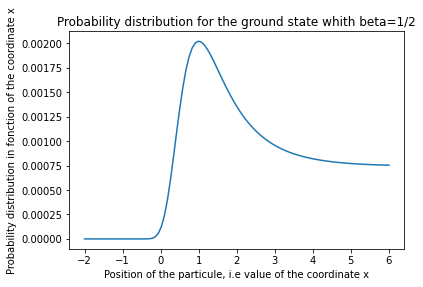

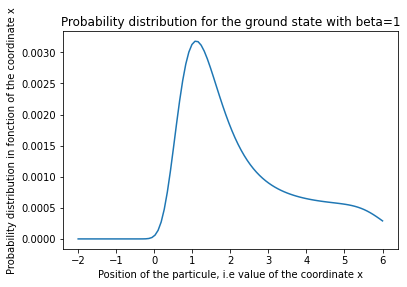

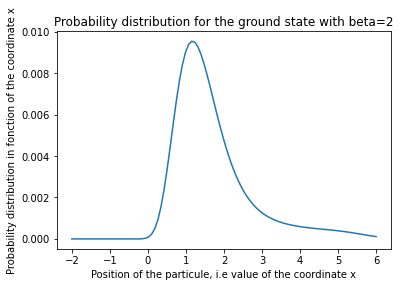

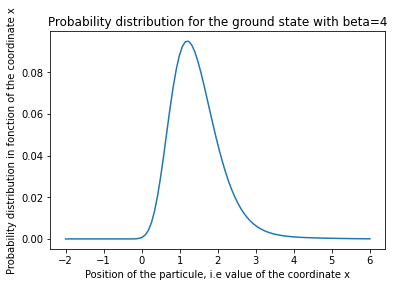

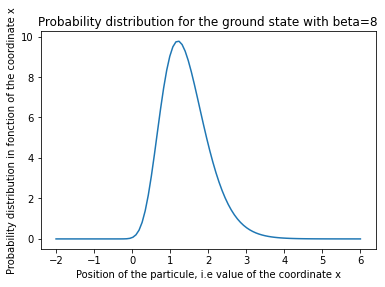

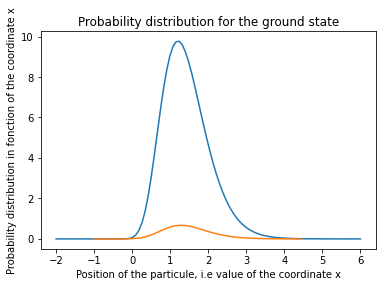

In [34]:
import numpy as np
import math
import numpy
import matplotlib.pyplot as plt

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))
    
def potential(x):
    return 2*((math.exp(-2*(x-1))) - (2*(math.exp(-(x-1)))))

def initial(x,xp,beta):
    return math.exp((-beta/2)*potential(x))*rho_free(x,xp,beta)*math.exp((-beta/2)*potential(xp))

def matrix_initial(N_size,beta):
    x_grid=np.linspace(-2,6,N_size)
    delta_x = x_grid[1] - x_grid[0]
    M=np.zeros((len(x_grid),len(x_grid)))
    for i in range(len(x_grid)):
        for j in range(len(x_grid)):
            M[i,j]=initial(x_grid[i],x_grid[j],beta)
    return M, delta_x,x_grid

def squaring_procedure(M,delta_x,beta):
    M = numpy.dot(M,M)
    M *= delta_x
    beta = 2.0*beta
    return M, beta

def question_6_matrix(N_size,beta0,beta_end):
    M, delta_x,x_grid=matrix_initial(N_size,beta0)
    N_local,dummy= np.shape(M)
    normalize = numpy.trace(M)
    rho_all_beta=[]
    rho=[]
    for i in range(N_local):
        k=M[i,i]
        k=k/normalize
        k=k *delta_x
        rho.append(k)

    rho_all_beta.append(rho)
    beta=beta0

    while beta < beta_end :
        M, beta= squaring_procedure(M,delta_x,beta)
        rho=[]
        for i in range(N_local):
            k=M[i,i]
            k=k/normalize
            k=k*delta_x
            rho.append(k)
        rho_all_beta.append(rho)
    return rho_all_beta, x_grid

def question_6_plot(N_size,beta0,beta_end):
    rho_all, x_grid = question_6_matrix(N_size,beta0,beta_end)
    
    plt.plot(x_grid,rho_all[0])
    plt.title("Probability distribution for the ground state whith beta=1/2")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

    plt.plot(x_grid,rho_all[1])
    plt.title("Probability distribution for the ground state with beta=1")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

    plt.plot(x_grid,rho_all[2])
    plt.title("Probability distribution for the ground state with beta=2")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

    plt.plot(x_grid,rho_all[3])
    plt.title("Probability distribution for the ground state with beta=4")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

    plt.plot(x_grid,rho_all[4])
    plt.title("Probability distribution for the ground state with beta=8")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

question_6_plot(100,1/2,8)

def question_6_comparaison(N_size,beta0,beta_end):
    rho_all, x_grid = question_6_matrix(N_size,beta0,beta_end)
    x_range=numpy.arange(-1,4.5,0.05)
    probability=[]
    for i in range (len(x_range)):
        x=x_range[i]
        vp, VP = question_5(0,2,x)
        probability.append(abs(VP)**2)
    
    plt.plot(x_grid,rho_all[4])
    plt.plot(x_range,probability)
    plt.title("Probability distribution for the ground state")
    plt.ylabel("Probability distribution in fonction of the coordinate x")
    plt.xlabel("Position of the particule, i.e value of the coordinate x")
    plt.show()

question_6_comparaison(100,1/2,8)

(Q7) Calculate $p(x)$ using the local update Monte Carlo for $\beta=8$. Compare the results with (Q2).

First we need to define delta according to the thumb rule:
Thus it seems like delta=0.8 is a good choice
Now we can calculate p(x) :


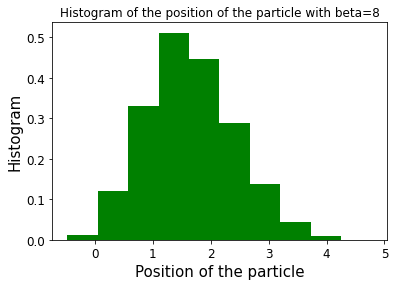

In [55]:
beta=8.0

def potential(x):
    return 2*((math.exp(-2*(x-1))) - (2*(math.exp(-(x-1)))))

def rho_free(x, y, beta_free):    # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta_free)) 

def Metropolis(delta,N,N_trials):
    #Starting Path 
    path=[]
    for i in range(N):
        k=random.uniform(-3,4)
        path.append(k)
    
    all_x_start=[path[0]]
    all_P_accept=[]
    
    for i in range(N_trials):
        dtau = beta / N
        
        #Choose the point to modify
        pick = random.randint(0,N-1)
        
        #Proposition Step
        del_x = random.uniform(-delta,delta)
        x_prop = path[pick] + del_x
    
        #Define properly which point is the previous one and the next one
        if pick == 0:
            pick_next = 1
            pick_prev= N-1
        elif pick == N-1:
            pick_next = 0
            pick_prev = N-2
        else :
            pick_next = pick+1
            pick_prev = pick-1
        
        #Metropolis Rejection
        V_current = potential(path[pick])
        V_prop = potential(x_prop)
        weight_new = rho_free(path[pick_prev],x_prop,dtau) * rho_free(x_prop,path[pick_next],dtau) * math.exp(-0.5*dtau*V_prop)
        weight_old = rho_free(path[pick_prev],path[pick],dtau) * rho_free(path[pick],path[pick_next],dtau) * math.exp(-0.5*dtau*V_current)
        
        P_test = weight_new/weight_old
    
        P_accept = min(1,P_test)
        all_P_accept.append(P_accept)
        
        Testeur = random.uniform(0,1)
        if Testeur <= P_accept :
            path[pick] = x_prop

        all_x_start.append(path[0])
    P_accept_mean = np.mean(all_P_accept)      
    return P_accept_mean,all_x_start


print('First we need to define delta according to the thumb rule:')
def Thumb_rule(N,N_trials):
    delta_list=np.linspace(0.01,1,20)
    all_mean=[]
    for k in range(len(delta_list)):
        mean,dummy=Metropolis(delta_list[k],N,N_trials)
        all_mean.append(mean)
    plt.plot(delta_list,all_mean)
    plt.title("P_acceptance in function of delta")
    plt.ylabel("P_acceptance")
    plt.xlabel("Value of delta")
    plt.show()
    
Thumb_rule(50,2**18)

print('Thus it seems like delta=0.8 is a good choice')
print('Now we can calculate p(x) :')

dummy,x_start = Metropolis(0.8,50,2**20)


plt.hist(x_start, density=True, facecolor='g')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Histogram of the position of the particle with beta=8')
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Position of the particle', fontsize=15)
    
plt.show()


(Q8) Prepare the particle in the ground state $\ket{\psi_0}$ of the Morse potential with $D_e=1$.
After the initial state is prepared, change the depth of potential to $D_e=0.5$ and simulate the real time dynamics up to time $t=10$. Make the animation.

In [56]:
import math
import numpy as np

def initial_state(n,De,x):
    E0, initial= question_5(n,De,x)
    return initial

def potential_De(x,De):
    return De*((math.exp(-2*(x-1))) - (2*(math.exp(-(x-1)))))

def FT(psi_x,x_grid,k_grid):
    N=len(psi_x)
    delta_x=x_grid[1]-x_grid[0]
    delta_k=k_grid[1]-k_grid[0]
    psi_k=np.zeros(N,dtype=complex)
    for i in range(N):
        for j in range(N):
            psi_k[i]+=delta_x/math.sqrt(2*pi)*psi_x[j]*np.exp(-1j*k_grid[i]*x_grid[j])
    return psi_k

def IFT(psi_k,x_grid,k_grid):
    N=len(psi_k)
    delta_x=x_grid[1]-x_grid[0]
    delta_k=k_grid[1]-k_grid[0]
    psi_x=np.zeros(N,dtype=complex)
    for i in range(N):
        for j in range(N):
            psi_x[i]+=delta_k/math.sqrt(2*pi)*psi_k[j]*np.exp(1j*x_grid[i]*k_grid[j])
    return psi_x

def time_prop(psi,pot,delta_t,x_grid,k_grid):
    N1=len(x_grid)
    N2=len(k_grid)
    for i in range(0,N1):
        psi[i]=np.exp(-1j*delta_t*pot[i]/2)*psi[i]
    psi_k=FT(psi,x_grid,k_grid)
    for i in range(0,N2):
        psi_k[i]=np.exp(-1j*delta_t*k_grid[i]**2/2)*psi_k[i]
    psi=IFT(psi_k,x_grid,k_grid)
    for i in range(0,N1):
        psi[i]=np.exp(-1j*delta_t*pot[i]/2)*psi[i]
    return psi


def question_8(t_max,T,x_min,x_max,k_min,k_max,N,De,n):
    x_grid=np.linspace(x_min,x_max,N)
    k_grid=np.linspace(k_min,k_max,N)
    t_grid=np.linspace(0,t_max,T+1)
    delta_t=t_max/T
    pot=[potential_De(x,De) for x in x_grid]
    prob=[]
    psi_x=[initial_state(n,1,x) for  x in x_grid] #In the initial state, De=1
    for i in range(T):
        psi_x=time_prop(psi_x,pot,delta_t,x_grid,k_grid)
        prob.append([abs(el)**2 for el in psi_x])
        

    return x_grid,prob,pot
    
x_grid,prob,pot=question_8(10,100,-2,10,-2,10,501,0.5,0)

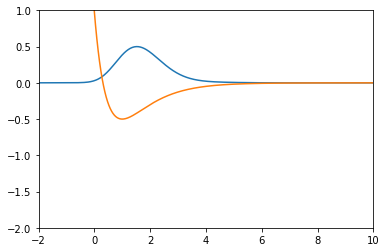

In [57]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

fig = plt.figure()
ax = plt.axes(xlim=(-2, 10), ylim=(-2, 1))
line1, = ax.plot([], [])
line2, = ax.plot([], [])

def animate(i):
    line1.set_data(x_grid, np.array(prob[i]))
    line2.set_data(x_grid, pot)
    return line1, line2,
    
anim = animation.FuncAnimation(fig, animate,frames= len(prob), interval=50)
anim


(Q9) Consider the problem where the depth of the potential is periodically driven $D_e(t)=(1+ \sin(\omega t))$, with the system initialized in the ground state. Plot $\langle x(t)\rangle$ for $\omega= 0.1$, $\omega=1$ and $\omega=10$. Comment on the results.

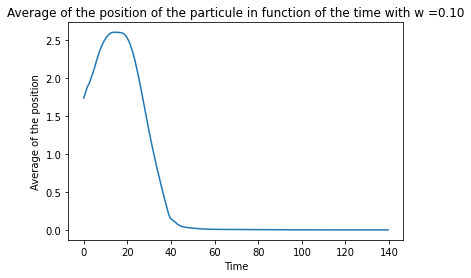

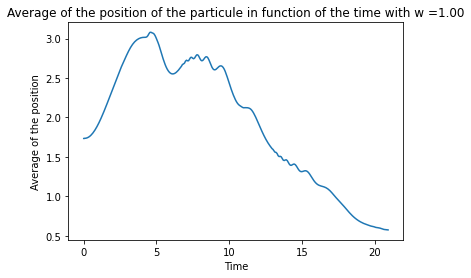

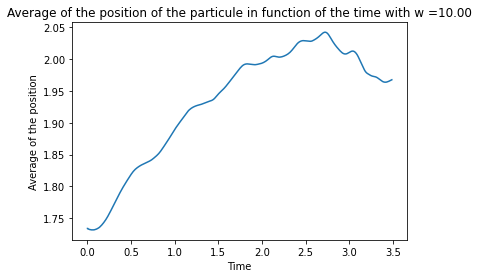

In [21]:
def De_function(w,t):
  return (1+np.sin(w*t))

def potential_De(x,w,t):
    De_f=De_function(w,t)
    return De_f*((math.exp(-2*(x-1))) - (2*(math.exp(-(x-1)))))

def question_9(t_max,T,x_min,x_max,k_min,k_max,N,w,n):
    x_grid=np.linspace(x_min,x_max,N)
    k_grid=np.linspace(k_min,k_max,N)
    t_grid=np.linspace(0,t_max,T+1)
    delta_t=t_max/T
    delta_x =x_grid[1]-x_grid[0]
    timing=[0]
    psi_x=[initial_state(n,1,x) for  x in x_grid] #In the initial state, De=1
    ave_x_t=[]
    sum=0
    for j in range(len(x_grid)):
        sum= sum + (delta_x*x_grid[j]*abs(psi_x[j])**2)
    ave_x_t.append(sum)
    for i in range(T):
        sum=0
        timing.append(i*delta_t)
        pot=[potential_De(x,w,i*delta_t) for x in x_grid]
        psi_x=time_prop(psi_x,pot,delta_t,x_grid,k_grid)
        for j in range(len(x_grid)):
           sum= sum + (delta_x*x_grid[j]*abs(psi_x[j])**2)
        ave_x_t.append(sum)
    
    plt.plot(timing,ave_x_t)
    plt.title('Average of the position of the particule in function of the time with w =%.2f'  % (w))
    plt.ylabel("Average of the position")
    plt.xlabel("Time")
    plt.show()


question_9(140,300,-2,10,-2,10,501,0.1,0)
question_9(21,300,-2,10,-2,10,501,1,0)
question_9(3.5,300,-2,10,-2,10,501,10,0)
